In [1]:
# Importing and setting up
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # additional plotting tools
from sosp import simple

In [2]:
# Verb choice: settle on a noun-verb link -> number marking
centers = np.array([[1, 0], [0, 1.]]) # N1-V, N2-V
cond_names = ['container_long', 'collection_long', 'measure_long', 'quant_long',
              'container_short', 'collection_short', 'measure_short', 'quant_short']
#ml = 0.8  # 0.8 used for EI, but not needed here
gamma = 0.2  # 0.4 = default

## Features
Noun, container, spatial config., prohib. abstract N2, present

| Word | Noun | container | spatial config. | prohib. abstract N2 | present |
| - | - | - | - | - | - |
| Container | 1 | 1 | 1 | 1 | 1 |
| Collection | 1 | 0 | 1 | 1 | 1 |
| Measure | 1 | 0 | 0 | 0 | 1 |
| Quant | 0 | 0 | 0 | 0 | 1 |
| N2 | 1 | 1 | 1 | 0 (1) | 1/0 |
| Verb's subject attch. site | 1 | 1 | 1 | 1 | 1 |

In [14]:
fm = 0.2  # cost per missing feature
# Making N2 not quite perfect; excellent fit to the data
cond_harmonies = np.array([[1, 1-fm],
                           [1-fm, 1-fm],
                           [1-fm*3, 1-fm],
                           [1-fm*4, 1-fm],
                           [1, 1-fm*2],
                           [1-fm, 1-fm*2],
                           [1-fm*3, 1-fm*2],
                           [1-fm*4, 1-fm*2]])

# Making N2 a perfect match all the time; good, but not great fit to data
#cond_harmonies = np.array([[1, 1],
#                           [1-fm, 1],
#                           [1-fm*3, 1],
#                           [1-fm*4, 1],
#                           [1, 1-fm],
#                           [1-fm, 1-fm],
#                           [1-fm*3, 1-fm],
#                           [1-fm*4, 1-fm]])

cond_harmonies

array([[1. , 0.8],
       [0.8, 0.8],
       [0.4, 0.8],
       [0.2, 0.8],
       [1. , 0.6],
       [0.8, 0.6],
       [0.4, 0.6],
       [0.2, 0.6]])

In [15]:
xinit = np.zeros(centers.shape[1])
sys = simple.SimpleModel(corpus_filename=None, centers=centers, local_harmonies=np.array([0, 0]),
                         stopping_crit='cheb_stop')
sys.set_gamma(gamma)
sys.set_noise_mag(0.0005)
sys.locate_attrs()

Found 2 unique attractors from 2 centers


In [16]:
for c in range(cond_harmonies.shape[0]):
    sys.set_local_harmonies(cond_harmonies[c,])
    sys.locate_attrs()

Found 2 unique attractors from 2 centers
Found 2 unique attractors from 2 centers
Found 2 unique attractors from 2 centers
Found 1 unique attractors from 2 centers
Found 2 unique attractors from 2 centers
Found 2 unique attractors from 2 centers
Found 2 unique attractors from 2 centers
Found 1 unique attractors from 2 centers


In [17]:
data = sys.run_multiple_conditions(n_runs=100, conditions=cond_harmonies)
# Error in line 130 of simple.py: 'Length of values does not match length of index'; seems to be noise-related

Found 2 unique attractors from 2 centers
Condition 0
Run number:
[0] Found 2 unique attractors from 2 centers
Condition 1
Run number:
[0] Found 2 unique attractors from 2 centers
Condition 2
Run number:
[0] Found 1 unique attractors from 2 centers
Condition 3
Run number:
[0] Found 2 unique attractors from 2 centers
Condition 4
Run number:
[0] Found 2 unique attractors from 2 centers
Condition 5
Run number:
[0] Found 2 unique attractors from 2 centers
Condition 6
Run number:
[0] Found 1 unique attractors from 2 centers
Condition 7
Run number:
[0] 

In [18]:
cond_dict = {i: n for i, n in zip(range(len(cond_names)), cond_names)}
data['Condition'] = data.Condition.map(cond_dict)
print(data.groupby(['Condition', 'CenterNr']).agg(['mean', 'std', 'count']))
print(data.groupby(['Condition']).Time.agg(['mean', 'std']))

                                 Time                  
                                 mean         std count
Condition        CenterNr                              
collection_long  0         274.666667   49.671991    51
                 1         273.693878   49.111779    49
collection_short 0         283.185185   46.566380    81
                 1         342.842105   44.792439    19
container_long   0         219.050633   34.136941    79
                 1         263.095238   41.769492    21
container_short  0         229.042105   46.764443    95
                 1         339.600000   92.354209     5
measure_long     0         433.666667   25.579940     3
                 1         287.463918   58.570126    97
measure_short    0         512.500000  109.269891    12
                 1         374.500000   82.741253    88
quant_long       1         282.410000   66.282392   100
quant_short      0         999.000000         NaN     1
                 1         397.393939   91.68644

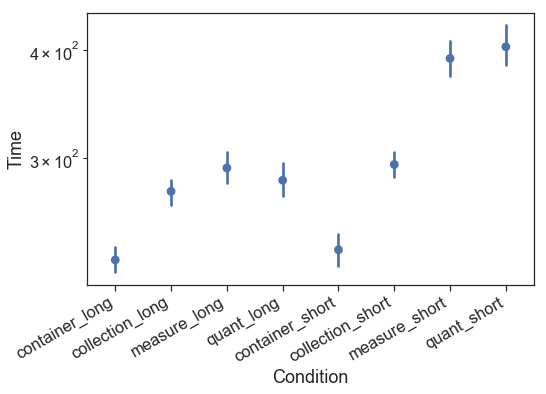

In [19]:
plt.subplots(figsize=(8, 5))
fig = sns.pointplot(x='Condition', y='Time', data=data, ci=95, linestyles='')
fig.set_xticklabels(fig.get_xticklabels(), rotation=30, ha='right')
fig.set_yscale('log')
plt.show()

In [9]:
def split_short(row):
    if 'short' in row['Condition']:
        return '-N2'
    elif 'long' in row['Condition']:
        return '+N2'


def split_n1(row):
    if 'cont' in row['Condition']:
        return 'Cont.'
    elif 'coll' in row['Condition']:
        return 'Coll.'
    elif 'meas' in row['Condition']:
        return 'Meas.'
    elif 'quant' in row['Condition']:
        return 'Quant.'

In [20]:
data['N2Presence'] = data.apply(lambda row: split_short(row), axis=1)
data['N1Type'] = data.apply(lambda row: split_n1(row), axis=1)

In [21]:
data.head()

,CenterNr,Time,Condition,N2Presence,N1Type
0,0,291,container_long,+N2,Cont.
0,1,257,container_long,+N2,Cont.
0,0,215,container_long,+N2,Cont.
0,0,203,container_long,+N2,Cont.
0,1,267,container_long,+N2,Cont.


/Users/garrettsmith/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/garrettsmith/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

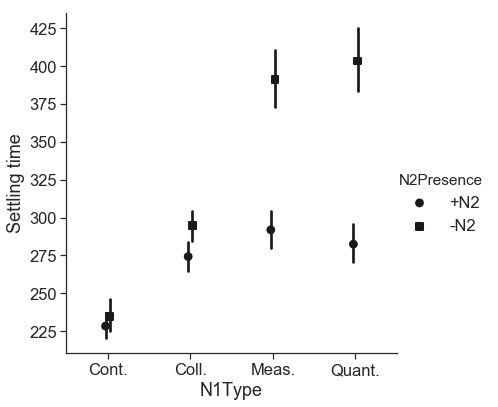

In [22]:
sns.set(font_scale=1.5)
sns.set_style('ticks')
sns.despine()
g = sns.factorplot(x="N1Type", y="Time", hue="N2Presence", data=data, kind="point", linestyles='', dodge=True,
                   size=6, legend_out=True, markers=['o', 's'], palette={"+N2": "k", "-N2": "k"})
plt.ylabel('Settling time')
plt.show()

In [62]:
g.savefig('PsPartSimpleRTs02.pdf')

/Users/garrettsmith/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/garrettsmith/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


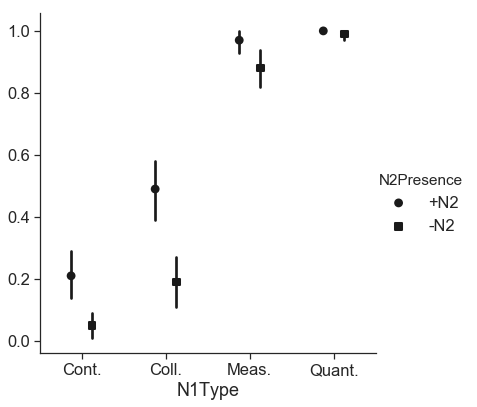

In [23]:
g2 = sns.factorplot(x="N1Type", y="CenterNr", hue="N2Presence", data=data, kind="point", linestyles='',
                    dodge=0.25, size=6, markers=['o', 's'], palette={"+N2": "k", "-N2": "k"}, legend_out=True)
#plt.legend(loc='right')
plt.ylabel('')
plt.show()

In [65]:
g2.savefig('PsPartSimpleProps02.pdf')

In [24]:
import pandas as pd
def entr_fn(x):
    pr = sum(x) / len(x)
    S = -pr*np.log(pr) - (1-pr)*np.log(1-pr)
    if not np.isnan(S):
        return S
    else:
        return 0.0
entr = pd.DataFrame(data.copy().groupby(['N1Type', 'N2Presence']).CenterNr.agg(entr_fn)).reset_index()
#print(entr)
entr[(entr['N1Type']=='Coll.') & (entr['N2Presence']=='+N2')]
data['Entropy'] = 0
data.head()
for n in ['Cont.', 'Coll.', 'Meas.', 'Quant.']:
    for l in ['+N2', '-N2']:
        d = entr.loc[(entr['N1Type']==n) & (entr['N2Presence']==l),:].values.flatten()[-1]
        data.loc[(data['N1Type']==n) & (data['N2Presence']==l), 'Entropy'] = d
data.head()

/Users/garrettsmith/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/Users/garrettsmith/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars


,CenterNr,Time,Condition,N2Presence,N1Type,Entropy
0,0,291,container_long,+N2,Cont.,0.513957
0,1,257,container_long,+N2,Cont.,0.513957
0,0,215,container_long,+N2,Cont.,0.513957
0,0,203,container_long,+N2,Cont.,0.513957
0,1,267,container_long,+N2,Cont.,0.513957


In [25]:
entr

,N1Type,N2Presence,CenterNr
0,Coll.,+N2,0.692947
1,Coll.,-N2,0.486223
2,Cont.,+N2,0.513957
3,Cont.,-N2,0.198515
4,Meas.,+N2,0.134742
5,Meas.,-N2,0.366925
6,Quant.,+N2,0.000000
7,Quant.,-N2,0.056002


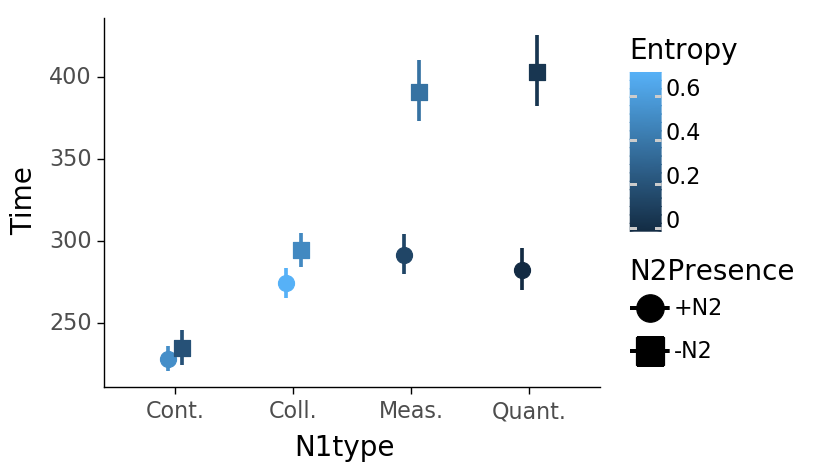

<ggplot: (-9223372036562323733)>

In [28]:
from plotnine import *
from pandas.api.types import CategoricalDtype
n1typelist = ['Cont.', 'Coll.', 'Meas.', 'Quant.']
n1_cat = CategoricalDtype(categories=n1typelist, ordered=True)
data['N1type'] = data['N1Type'].astype(str).astype(n1_cat)

g = ggplot(data, aes(x = 'N1type', y = 'Time', shape='N2Presence', color='Entropy')) +\
stat_summary(size=1.5, position=position_dodge(width=0.25)) + scale_color_gradient() +\
scale_shape_manual(values=('o', 's')) +\
theme_classic(base_size = 20)
g

In [ ]:
g.save(filename='PsPartModRT.pdf',
       path='/Users/garrettsmith/Google Drive/UConn/Research/Dissertation/DissertationDefense/Figures',
       width=8, height=8, units='in')

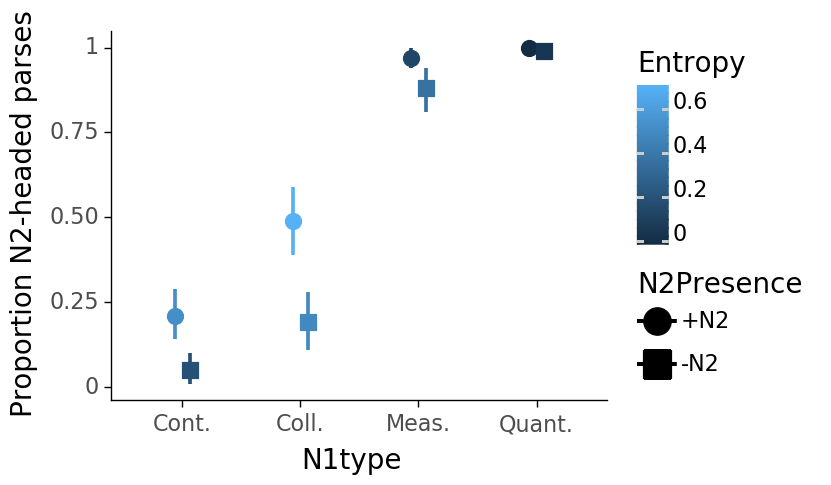

<ggplot: (294326262)>

In [29]:
g2 = ggplot(data, aes(x = 'N1type', y = 'CenterNr', shape='N2Presence', color='Entropy')) +\
stat_summary(size=1.5, position=position_dodge(width=0.25)) + scale_color_gradient() +\
scale_shape_manual(values=('o', 's')) +\
labs(y='Proportion N2-headed parses') + theme_classic(base_size = 20)
g2

In [ ]:
g2.save(filename='PsPartModProps.pdf',
       path='/Users/garrettsmith/Google Drive/UConn/Research/Dissertation/DissertationDefense/Figures',
       width=8, height=8, units='in')